# Исследование по RTS

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
# Загрузка 5 минутных данных
df = pd.read_csv('rts_m5_TVI_CCI_T3_GHL.csv')
df['tradedate'] = pd.to_datetime(df['tradedate'])

df

,tradedate,open,high,low,close,tvi,cci,t3,ghl
0,2015-01-05 10:00:00,78450.0,78450.0,73200.0,73930.0,0,0,0,0
1,2015-01-05 10:05:00,73890.0,74700.0,73660.0,74700.0,1,0,1,0
2,2015-01-05 10:10:00,74700.0,74720.0,73830.0,73950.0,1,0,1,0
3,2015-01-05 10:15:00,73970.0,74440.0,73620.0,74430.0,1,0,1,0
4,2015-01-05 10:20:00,74400.0,74720.0,74220.0,74410.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
411669,2024-12-30 23:25:00,90630.0,90740.0,90350.0,90390.0,-1,1,-1,-1
411670,2024-12-30 23:30:00,90430.0,90430.0,90380.0,90380.0,-1,-1,-1,-1
411671,2024-12-30 23:35:00,90380.0,90390.0,90280.0,90390.0,-1,-1,-1,-1
411672,2024-12-30 23:40:00,90390.0,90480.0,90390.0,90450.0,-1,1,-1,0


Создание дата фрейма с колонкой **'buy_sell'** признаков открытия позиции Bay или Sell.

In [233]:
# Добавляем колонку с направлением торговли
conditions = [
    (df['tvi'] == 1) & (df['cci'] == 1) & (df['t3'] == 1) & (df['ghl'] == 1),
    (df['tvi'] == -1) & (df['cci'] == -1) & (df['t3'] == -1) & (df['ghl'] == -1)
]
choices = [1, -1]
df['buy_sell'] = np.select(conditions, choices, default=0)

df['buy_sell'] = df['buy_sell'].shift(1)
df = df.dropna()

# Создаем копию DataFrame
df = df.copy()
# Приводим колонку 'buy_sell' к целочисленным значениям
df['buy_sell'] = df['buy_sell'].astype(int)

df['napr'] = np.nan

df

,tradedate,open,high,low,close,tvi,cci,t3,ghl,buy_sell,napr
1,2015-01-05 10:05:00,73890.0,74700.0,73660.0,74700.0,1,0,1,0,0,NaN
2,2015-01-05 10:10:00,74700.0,74720.0,73830.0,73950.0,1,0,1,0,0,NaN
3,2015-01-05 10:15:00,73970.0,74440.0,73620.0,74430.0,1,0,1,0,0,NaN
4,2015-01-05 10:20:00,74400.0,74720.0,74220.0,74410.0,1,0,1,0,0,NaN
5,2015-01-05 10:25:00,74420.0,74420.0,73600.0,73610.0,1,0,-1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
411669,2024-12-30 23:25:00,90630.0,90740.0,90350.0,90390.0,-1,1,-1,-1,1,NaN
411670,2024-12-30 23:30:00,90430.0,90430.0,90380.0,90380.0,-1,-1,-1,-1,0,NaN
411671,2024-12-30 23:35:00,90380.0,90390.0,90280.0,90390.0,-1,-1,-1,-1,-1,NaN
411672,2024-12-30 23:40:00,90390.0,90480.0,90390.0,90450.0,-1,1,-1,0,-1,NaN


Создаем колонку с направлением открытой позиции __"napr"__.

In [234]:
# Условие для установки значения 1
condition_1 = (df['buy_sell'] == 1)
# Условие для установки значения -1
condition_2 = (df['buy_sell'] == -1)

# Применяем условия
df.loc[condition_1, 'napr'] = 1
df.loc[condition_2, 'napr'] = -1

# Заполняем оставшиеся значения
df['napr'] = df['napr'].ffill()

# Заменяем значения NaN на 0
df.fillna(0, inplace=True)
df['napr'] = df['napr'].astype(int)

df

,tradedate,open,high,low,close,tvi,cci,t3,ghl,buy_sell,napr
1,2015-01-05 10:05:00,73890.0,74700.0,73660.0,74700.0,1,0,1,0,0,0
2,2015-01-05 10:10:00,74700.0,74720.0,73830.0,73950.0,1,0,1,0,0,0
3,2015-01-05 10:15:00,73970.0,74440.0,73620.0,74430.0,1,0,1,0,0,0
4,2015-01-05 10:20:00,74400.0,74720.0,74220.0,74410.0,1,0,1,0,0,0
5,2015-01-05 10:25:00,74420.0,74420.0,73600.0,73610.0,1,0,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
411669,2024-12-30 23:25:00,90630.0,90740.0,90350.0,90390.0,-1,1,-1,-1,1,1
411670,2024-12-30 23:30:00,90430.0,90430.0,90380.0,90380.0,-1,-1,-1,-1,0,1
411671,2024-12-30 23:35:00,90380.0,90390.0,90280.0,90390.0,-1,-1,-1,-1,-1,-1
411672,2024-12-30 23:40:00,90390.0,90480.0,90390.0,90450.0,-1,1,-1,0,-1,-1


In [235]:
# # Сохранение в файл для ручной проверки
# df.to_excel('GMTS_RTS_TMP.xlsx')

In [236]:
# Вычисляем, где изменилось значение в 'napr'
df['sig_open'] = df['open'].where(df['napr'] != df['napr'].shift())
df['sig_open'] = df['sig_open'].fillna(0)

df

,tradedate,open,high,low,close,tvi,cci,t3,ghl,buy_sell,napr,sig_open
1,2015-01-05 10:05:00,73890.0,74700.0,73660.0,74700.0,1,0,1,0,0,0,73890.0
2,2015-01-05 10:10:00,74700.0,74720.0,73830.0,73950.0,1,0,1,0,0,0,0.0
3,2015-01-05 10:15:00,73970.0,74440.0,73620.0,74430.0,1,0,1,0,0,0,0.0
4,2015-01-05 10:20:00,74400.0,74720.0,74220.0,74410.0,1,0,1,0,0,0,0.0
5,2015-01-05 10:25:00,74420.0,74420.0,73600.0,73610.0,1,0,-1,-1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
411669,2024-12-30 23:25:00,90630.0,90740.0,90350.0,90390.0,-1,1,-1,-1,1,1,0.0
411670,2024-12-30 23:30:00,90430.0,90430.0,90380.0,90380.0,-1,-1,-1,-1,0,1,0.0
411671,2024-12-30 23:35:00,90380.0,90390.0,90280.0,90390.0,-1,-1,-1,-1,-1,-1,90380.0
411672,2024-12-30 23:40:00,90390.0,90480.0,90390.0,90450.0,-1,1,-1,0,-1,-1,0.0


Создаем колонку **"profit"** в которую записываем:  
если значение в колонке 'buy_sell' равно 1, то из ближайшего последующего значения в колонке 'sig_open' не равного 0, вычесть текущее значение в колонке 'sig_open'  
если значение в колонке 'buy_sell' равно -1, то из текущего значения в колонке 'sig_open', вычесть ближайшее последующее значение в колонке 'sig_open' не равное 0  
иначе, записать в колонку 0

In [237]:
def calculate_profit(row, sig_open_col, napr_col):
    # Индекс текущей строки
    current_index = row.name

    # Значение napr для текущей строки
    napr = row[napr_col]
    sig_open = row[sig_open_col]

    # Если napr равно 1
    if (napr == 1) & (sig_open != 0.0):
        # Найти ближайшее последующее значение в sig_open, не равное 0
        for next_value in df.loc[current_index + 1:, sig_open_col]:
            if next_value != 0.0:
                return next_value - sig_open

    # Если napr равно -1
    elif (napr == -1) & (sig_open != 0.0):
        # Найти ближайшее последующее значение в sig_open, не равное 0
        for next_value in df.loc[current_index + 1:, sig_open_col]:
            if next_value != 0.0:
                return sig_open - next_value

    # Если buy_sell не равно 1 или -1
    return 0

# Применить функцию ко всем строкам
df['profit'] = df.apply(calculate_profit, axis=1, sig_open_col='sig_open', napr_col='napr')

# Результат
df

,tradedate,open,high,low,close,tvi,cci,t3,ghl,buy_sell,napr,sig_open,profit
1,2015-01-05 10:05:00,73890.0,74700.0,73660.0,74700.0,1,0,1,0,0,0,73890.0,0.0
2,2015-01-05 10:10:00,74700.0,74720.0,73830.0,73950.0,1,0,1,0,0,0,0.0,0.0
3,2015-01-05 10:15:00,73970.0,74440.0,73620.0,74430.0,1,0,1,0,0,0,0.0,0.0
4,2015-01-05 10:20:00,74400.0,74720.0,74220.0,74410.0,1,0,1,0,0,0,0.0,0.0
5,2015-01-05 10:25:00,74420.0,74420.0,73600.0,73610.0,1,0,-1,-1,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411669,2024-12-30 23:25:00,90630.0,90740.0,90350.0,90390.0,-1,1,-1,-1,1,1,0.0,0.0
411670,2024-12-30 23:30:00,90430.0,90430.0,90380.0,90380.0,-1,-1,-1,-1,0,1,0.0,0.0
411671,2024-12-30 23:35:00,90380.0,90390.0,90280.0,90390.0,-1,-1,-1,-1,-1,-1,90380.0,0.0
411672,2024-12-30 23:40:00,90390.0,90480.0,90390.0,90450.0,-1,1,-1,0,-1,-1,0.0,0.0


In [238]:
# # Сохранение в файл для ручной проверки
# df.to_excel('GMTS_RTS_TMP_2.xlsx')

Фильтрация

In [239]:
# Очистка df
df = df[df["profit"] != 0.0]

# Фильтрация строк с марта 2015 и времени до 19:00:00
df = df[
    (df["tradedate"] >= pd.Timestamp("2015-03-01")) & 
    (df["tradedate"].dt.time < pd.to_datetime("19:00:00").time())
]

df = df.copy().reset_index(drop=True)

# Добавление колонки с датой
df['date'] = df['tradedate'].dt.date

# Добавление колонки с временем
df['time'] = df['tradedate'].dt.time

# # Удаление колонки "sig", далее используется колонка "buy_sell"
# df = df.drop(columns='sig')

# Учет спреда при симуляции торговли
df["profit"] = df["profit"] - 30

df

,tradedate,open,high,low,close,tvi,cci,t3,ghl,buy_sell,napr,sig_open,profit,date,time
0,2015-03-02 10:05:00,89890.0,90030.0,89550.0,89760.0,-1,-1,-1,-1,-1,-1,89890.0,-200.0,2015-03-02,10:05:00
1,2015-03-02 11:05:00,90060.0,90220.0,89980.0,90060.0,1,1,1,1,1,1,90060.0,70.0,2015-03-02,11:05:00
2,2015-03-02 12:40:00,90160.0,90420.0,90100.0,90330.0,-1,1,-1,0,-1,-1,90160.0,550.0,2015-03-02,12:40:00
3,2015-03-02 15:50:00,89580.0,89690.0,89520.0,89600.0,1,-1,1,0,1,1,89580.0,-70.0,2015-03-02,15:50:00
4,2015-03-02 17:05:00,89540.0,89840.0,89520.0,89760.0,1,1,1,0,-1,-1,89540.0,-550.0,2015-03-02,17:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17801,2024-12-28 16:35:00,88760.0,88800.0,88530.0,88550.0,-1,-1,-1,-1,-1,-1,88760.0,70.0,2024-12-28,16:35:00
17802,2024-12-30 11:35:00,89850.0,89850.0,89690.0,89740.0,-1,-1,-1,-1,-1,-1,89850.0,130.0,2024-12-30,11:35:00
17803,2024-12-30 14:15:00,89690.0,89920.0,89660.0,89880.0,1,1,1,1,1,1,89690.0,-50.0,2024-12-30,14:15:00
17804,2024-12-30 15:40:00,89670.0,89840.0,89600.0,89790.0,-1,-1,-1,-1,-1,-1,89670.0,-460.0,2024-12-30,15:40:00


In [240]:
print(f'Средний профит на сделку: {df['profit'].mean().round(2)}')

Средний профит на сделку: -28.48


Создание DF с профитом по времени открытия сделок.

In [241]:
df_time = (
    df.groupby(['time'], as_index=False)
    .agg(
        total_profit=('profit', 'sum'),  # Сумма значений profit
        count_profit=('profit', 'count')  # Количество значений profit
    )
    .sort_values(['total_profit'], ascending=False)
)

df_time['profit_avg'] = df_time['total_profit'] / df_time['count_profit']

df_time['profit_avg'] = df_time['profit_avg'].round(2)

print(df_time.sort_values (by='profit_avg', ascending=False).head(20))

         time  total_profit  count_profit  profit_avg
35   09:55:00       12910.0            35      368.86
6    07:30:00        1340.0             5      268.00
11   07:55:00        1910.0             9      212.22
26   09:10:00        9320.0            65      143.38
16   08:20:00        1520.0            12      126.67
56   11:40:00       13850.0           141       98.23
119  16:55:00       16190.0           170       95.24
112  16:20:00       14590.0           156       93.53
62   12:10:00       12980.0           156       83.21
74   13:10:00       12720.0           159       80.00
46   10:50:00        8020.0           101       79.41
72   13:00:00       10100.0           142       71.13
100  15:20:00       12170.0           174       69.94
121  17:05:00       10440.0           154       67.79
51   11:15:00        9220.0           141       65.39
18   08:30:00         860.0            14       61.43
41   10:25:00        6460.0           132       48.94
126  17:30:00        6960.0 

In [242]:
# # Сохранение в файл
# df_time.sort_values(by='time', ascending=True).to_excel('GMTS_исследования_времени_торговли.xlsx')

Создание графика со средними значениями профита

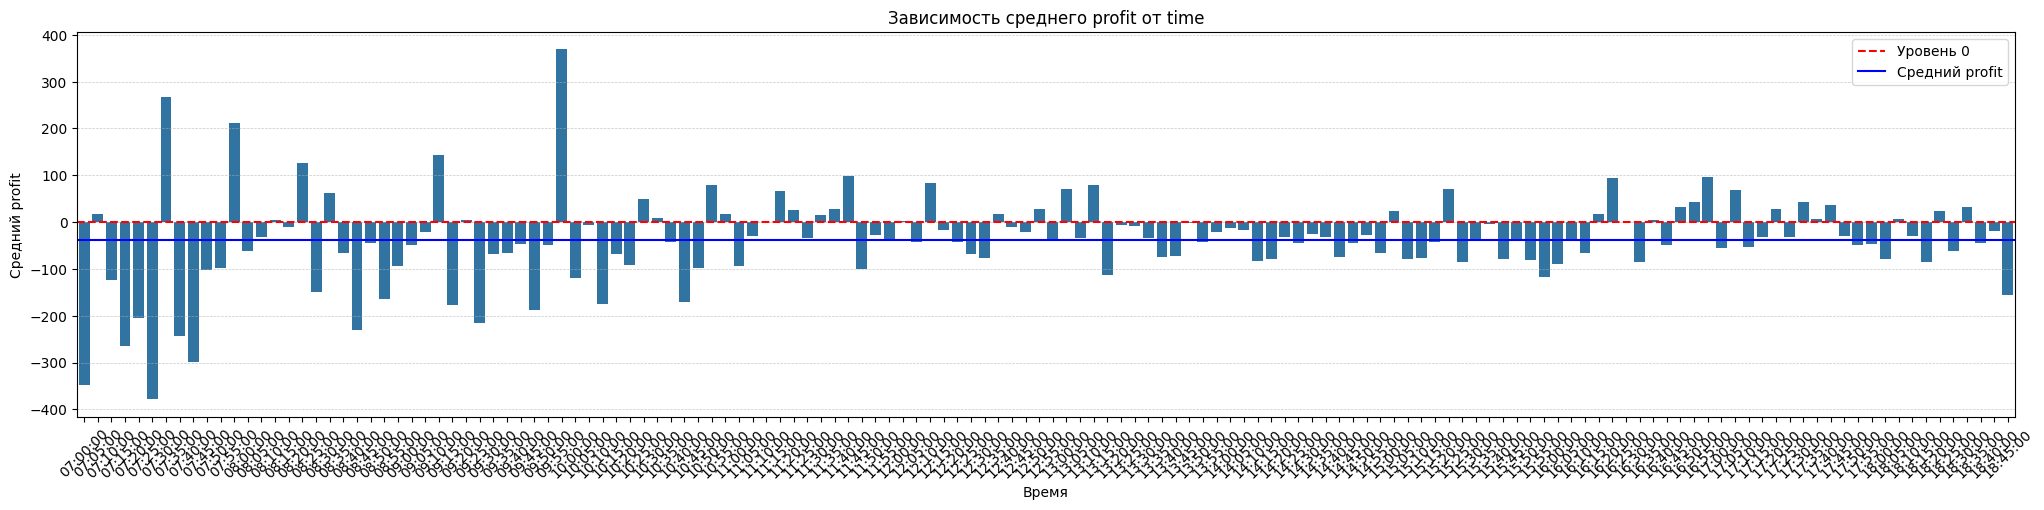

In [243]:
df_time = df_time.sort_values(by='time', ascending=True)

# Строим график зависимости
plt.figure(figsize=(25, 5))
sns.barplot(x=df_time['time'].astype(str), y=df_time['profit_avg'])

# Добавляем горизонтальные линии
plt.axhline(
    y=0, color='red', linestyle='--', linewidth=1.5, label='Уровень 0'
    )  # Пример линии на уровне 0
plt.axhline(
    y=df_time['profit_avg'].mean(), color='blue', linestyle='-', linewidth=1.5, 
    label='Средний profit'
    )  # Среднее значение

# Добавляем горизонтальную сетку
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)  # Только по оси Y

# Настройки графика
plt.xticks(rotation=45)  # Поворачиваем подписи оси X для читаемости
plt.title('Зависимость среднего profit от time')
plt.xlabel('Время')
plt.ylabel('Средний profit')
plt.legend()  # Добавляем легенду
plt.show()

# Прибыль по сделкам за 15:15-18:20

In [244]:
# Фильтрация строк с 15:15:00
df_amer = df[
         (df["tradedate"].dt.time >= pd.to_datetime("15:15:00").time()) & 
         (df["tradedate"].dt.time <= pd.to_datetime("18:20:00").time())
]

df_amer

,tradedate,open,high,low,close,tvi,cci,t3,ghl,buy_sell,napr,sig_open,profit,date,time
3,2015-03-02 15:50:00,89580.0,89690.0,89520.0,89600.0,1,-1,1,0,1,1,89580.0,-70.0,2015-03-02,15:50:00
4,2015-03-02 17:05:00,89540.0,89840.0,89520.0,89760.0,1,1,1,0,-1,-1,89540.0,-550.0,2015-03-02,17:05:00
5,2015-03-02 17:45:00,90060.0,90190.0,89960.0,90010.0,1,1,1,1,1,1,90060.0,-230.0,2015-03-02,17:45:00
13,2015-03-03 15:20:00,92110.0,92280.0,92060.0,92190.0,1,1,1,1,1,1,92110.0,-390.0,2015-03-03,15:20:00
14,2015-03-03 15:40:00,91750.0,91760.0,91630.0,91670.0,-1,-1,-1,-1,-1,-1,91750.0,230.0,2015-03-03,15:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17795,2024-12-27 17:35:00,88490.0,88500.0,88360.0,88410.0,1,1,1,1,1,1,88490.0,-50.0,2024-12-27,17:35:00
17800,2024-12-28 15:45:00,88870.0,88910.0,88810.0,88840.0,1,1,1,1,1,1,88870.0,-140.0,2024-12-28,15:45:00
17801,2024-12-28 16:35:00,88760.0,88800.0,88530.0,88550.0,-1,-1,-1,-1,-1,-1,88760.0,70.0,2024-12-28,16:35:00
17804,2024-12-30 15:40:00,89670.0,89840.0,89600.0,89790.0,-1,-1,-1,-1,-1,-1,89670.0,-460.0,2024-12-30,15:40:00


In [245]:
# Средний профит на сделку
print(f'Средний профит на сделку за 15:15-18:20: {df_amer['profit'].mean().round(2)}')

Средний профит на сделку за 15:15-18:20: -18.82


### Прибыль по дням  за 15:15-18:20

In [246]:
df_amer_date = (
    df_amer.groupby(['date'], as_index=False)
    .agg(
        total_profit=('profit', 'sum'),  # Сумма значений profit
        count_trade=('profit', 'count')  # Количество значений profit
    )
    # .sort_values(['total_profit'], ascending=False)
)

# df_amer_date.sort_values(by='date', ascending=True).to_excel('GMTS_даты_торговли.xlsx')

# Добавляем новую колонку для среднего профита на сделку
df_amer_date['avg_profit_per_trade'] = df_amer_date['total_profit'] / df_amer_date['count_trade']
avg_profit_per_trade = df_amer_date['avg_profit_per_trade'].mean().round(2)

df_amer_date

,date,total_profit,count_trade,avg_profit_per_trade
0,2015-03-02,-850.0,3,-283.333333
1,2015-03-03,-840.0,4,-210.000000
2,2015-03-04,1950.0,1,1950.000000
3,2015-03-05,-2060.0,5,-412.000000
4,2015-03-06,1910.0,3,636.666667
...,...,...,...,...
2343,2024-12-25,-300.0,3,-100.000000
2344,2024-12-26,-300.0,2,-150.000000
2345,2024-12-27,-260.0,3,-86.666667
2346,2024-12-28,-70.0,2,-35.000000


### Прибыль по месяцам за 15:15-18:20

In [247]:
df_tmp = df_amer.copy()

# Убедимся, что колонка с датой в формате datetime
df_tmp['date'] = pd.to_datetime(df_tmp['date'])

# Добавляем колонки для года и месяца
df_tmp['year_month'] = df_tmp['date'].dt.to_period('M')  # Год и месяц в формате YYYY-MM

# Группируем данные по году и месяцу
df_month_profit = (
    df_tmp.groupby('year_month')
    .agg(
        total_profit=('profit', 'sum'),    # Сумма прибыли за месяц
        total_trades=('profit', 'count')  # Количество сделок за месяц
    )
    .reset_index()
)

# # Если нужно, преобразуем 'year_month' обратно в строку
# month_profit['year_month'] = month_profit['year_month'].astype(str)

df_month_profit['dollar'] = df_month_profit['total_profit'] * 0.02

# df_month_profit.sort_values(by='year_month', ascending=True) \
#     .to_excel('GMTS_прибыль_месяца_15-19.xlsx', index=False)

df_month_profit

,year_month,total_profit,total_trades,dollar
0,2015-03,-2310.0,52,-46.2
1,2015-04,3830.0,52,76.6
2,2015-05,6380.0,49,127.6
3,2015-06,5450.0,45,109.0
4,2015-07,2340.0,54,46.8
...,...,...,...,...
113,2024-08,-460.0,56,-9.2
114,2024-09,2620.0,48,52.4
115,2024-10,-5140.0,58,-102.8
116,2024-11,1300.0,51,26.0


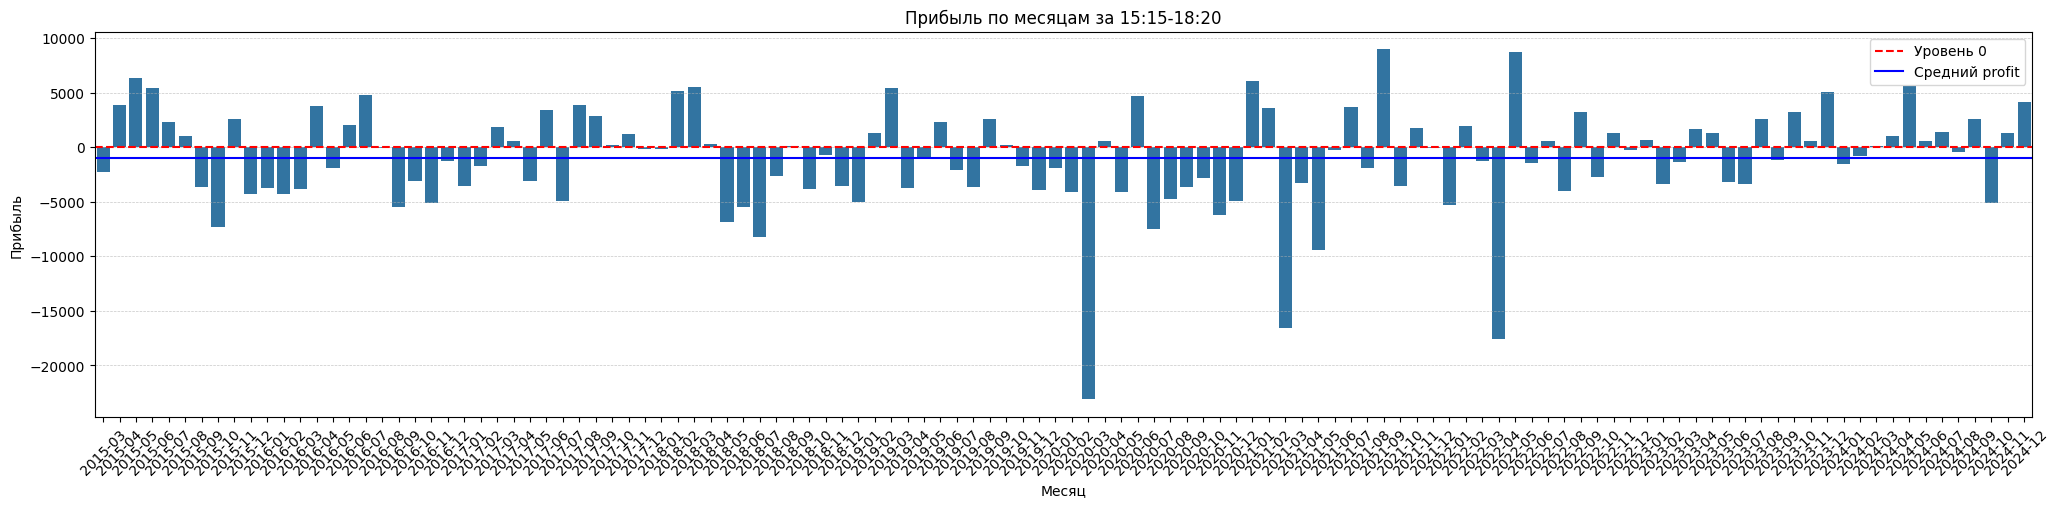

In [248]:
df_month_profit = df_month_profit.sort_values(by='year_month', ascending=True)

# Строим график зависимости
plt.figure(figsize=(25, 5))
sns.barplot(x=df_month_profit['year_month'].astype(str), y=df_month_profit['total_profit'])

# Добавляем горизонтальные линии
plt.axhline(
    y=0, color='red', linestyle='--', linewidth=1.5, label='Уровень 0'
    )  # Пример линии на уровне 0
plt.axhline(
    y=df_month_profit['total_profit'].mean(), color='blue', linestyle='-', linewidth=1.5, 
    label='Средний profit'
    )  # Среднее значение

# Добавляем горизонтальную сетку
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)  # Только по оси Y

plt.xticks(rotation=45)  # Поворачиваем подписи оси X для читаемости
plt.title('Прибыль по месяцам за 15:15-18:20')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')
plt.legend()  # Добавляем легенду
plt.show()

### График комулятивной прибыли за 15:15-18:20

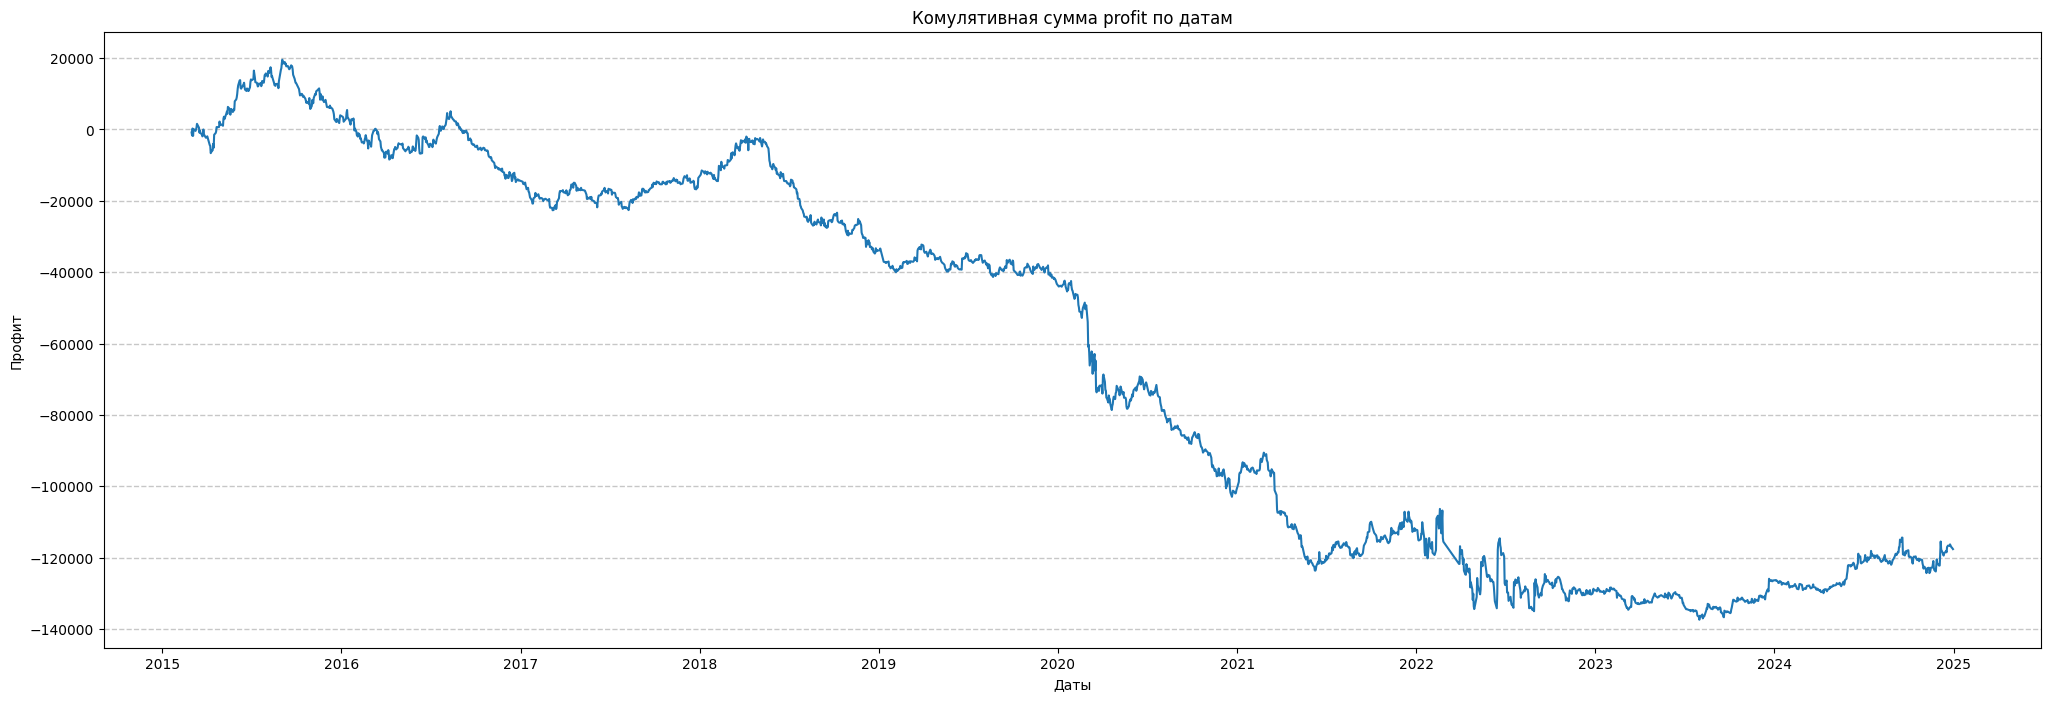

In [249]:
df_amer_date['sum_profit'] = df_amer_date['total_profit'].cumsum()

plt.figure(figsize=(25, 8))
sns.lineplot(data=df_amer_date, x=df_amer_date['date'], y='sum_profit')
plt.title('Комулятивная сумма profit по датам')
plt.grid(axis='y', linestyle='--', linewidth=1.0, alpha=0.7)  # Только по оси Y
plt.xlabel('Даты')
plt.ylabel('Профит')
plt.show()

# Прибыль за две сессии 10:05-14:10 и 15:15-18:30

In [250]:
# Фильтрация строк
df_2 = df[
         (df["tradedate"].dt.time >= pd.to_datetime("10:05:00").time()) & 
         (df["tradedate"].dt.time <= pd.to_datetime("14:10:00").time()) |
         (df["tradedate"].dt.time >= pd.to_datetime("15:15:00").time()) & 
         (df["tradedate"].dt.time <= pd.to_datetime("18:30:00").time())
].copy()

df_2

,tradedate,open,high,low,close,tvi,cci,t3,ghl,buy_sell,napr,sig_open,profit,date,time
0,2015-03-02 10:05:00,89890.0,90030.0,89550.0,89760.0,-1,-1,-1,-1,-1,-1,89890.0,-200.0,2015-03-02,10:05:00
1,2015-03-02 11:05:00,90060.0,90220.0,89980.0,90060.0,1,1,1,1,1,1,90060.0,70.0,2015-03-02,11:05:00
2,2015-03-02 12:40:00,90160.0,90420.0,90100.0,90330.0,-1,1,-1,0,-1,-1,90160.0,550.0,2015-03-02,12:40:00
3,2015-03-02 15:50:00,89580.0,89690.0,89520.0,89600.0,1,-1,1,0,1,1,89580.0,-70.0,2015-03-02,15:50:00
4,2015-03-02 17:05:00,89540.0,89840.0,89520.0,89760.0,1,1,1,0,-1,-1,89540.0,-550.0,2015-03-02,17:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17800,2024-12-28 15:45:00,88870.0,88910.0,88810.0,88840.0,1,1,1,1,1,1,88870.0,-140.0,2024-12-28,15:45:00
17801,2024-12-28 16:35:00,88760.0,88800.0,88530.0,88550.0,-1,-1,-1,-1,-1,-1,88760.0,70.0,2024-12-28,16:35:00
17802,2024-12-30 11:35:00,89850.0,89850.0,89690.0,89740.0,-1,-1,-1,-1,-1,-1,89850.0,130.0,2024-12-30,11:35:00
17804,2024-12-30 15:40:00,89670.0,89840.0,89600.0,89790.0,-1,-1,-1,-1,-1,-1,89670.0,-460.0,2024-12-30,15:40:00


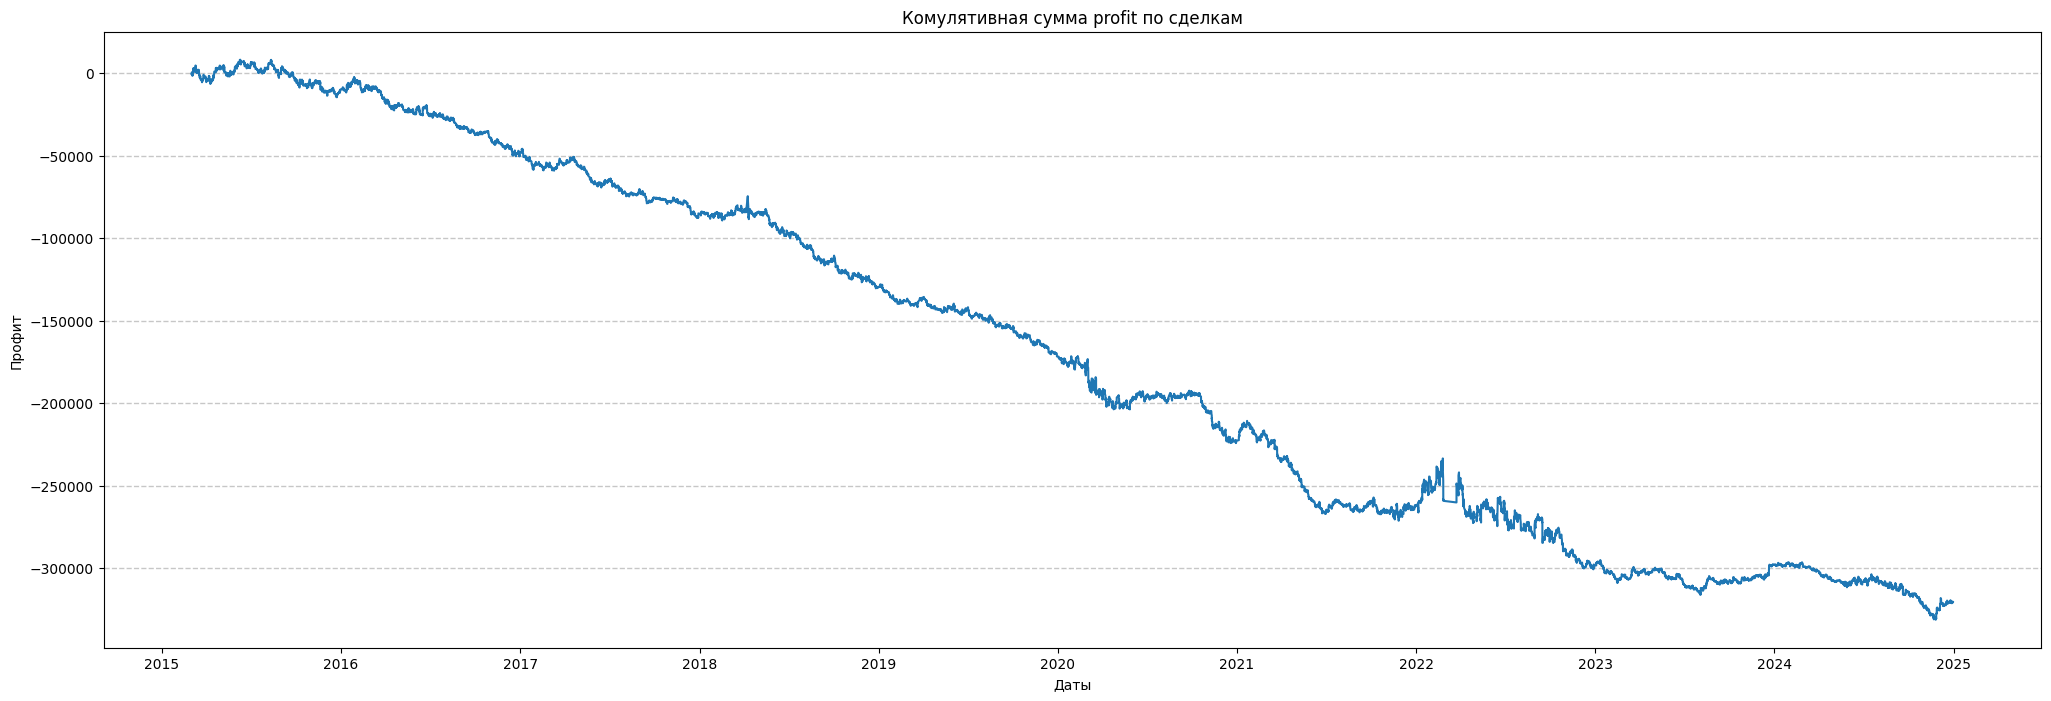

In [251]:
df_2['profit_cum'] = df_2['profit'].cumsum()

plt.figure(figsize=(25, 8))
sns.lineplot(data=df_2, x=df_2['tradedate'], y='profit_cum')
plt.title('Комулятивная сумма profit по сделкам')
plt.grid(axis='y', linestyle='--', linewidth=1.0, alpha=0.7)  # Только по оси Y
plt.xlabel('Даты')
plt.ylabel('Профит')
plt.show()

In [252]:
# Средний профит на сделку
print(f'{df_2['profit'].mean().round(1)} - Средний профит на сделку 10:05-14:10 и 15:15-18:20')
print(f'{df_2['profit'].median()} - Медиан профит на сделку 10:05-14:10 и 15:15-18:20')
print(f'{df_2['profit'].mode()} - Мода профит на сделку 10:05-14:10 и 15:15-18:20')
print(f'{df_2['profit'].max()} - Максимальный профит на сделку 10:05-14:10 и 15:15-18:20')
print(f'{df_2['profit'].min()} - Максимальный убыток на сделку 10:05-14:10 и 15:15-18:20')

-22.4 - Средний профит на сделку 10:05-14:10 и 15:15-18:20
-160.0 - Медиан профит на сделку 10:05-14:10 и 15:15-18:20
0   -220.0
1   -170.0
Name: profit, dtype: float64 - Мода профит на сделку 10:05-14:10 и 15:15-18:20
12170.0 - Максимальный профит на сделку 10:05-14:10 и 15:15-18:20
-12510.0 - Максимальный убыток на сделку 10:05-14:10 и 15:15-18:20


### Прибыль по дням за 2 сессии 10:05-14:10 и 15:15-18:30

In [253]:
df_2_date = (
    df_2.groupby(['date'], as_index=False)
    .agg(
        total_profit=('profit', 'sum'),  # Сумма значений profit
        count_trade=('profit', 'count')  # Количество значений profit
    )
    # .sort_values(['total_profit'], ascending=False)
)

# df_2_date.sort_values(by='date', ascending=True).to_excel('GMTS_даты_торговли.xlsx')

# Добавляем новую колонку для среднего профита на сделку
df_2_date['avg_profit_per_trade'] = df_2_date['total_profit'] / df_2_date['count_trade']
avg_profit_per_trade = df_2_date['avg_profit_per_trade'].mean().round(2)

df_2_date


,date,total_profit,count_trade,avg_profit_per_trade
0,2015-03-02,-430.0,6,-71.666667
1,2015-03-03,-100.0,7,-14.285714
2,2015-03-04,1130.0,5,226.000000
3,2015-03-05,210.0,7,30.000000
4,2015-03-06,2400.0,5,480.000000
...,...,...,...,...
2463,2024-12-25,420.0,5,84.000000
2464,2024-12-26,-1120.0,6,-186.666667
2465,2024-12-27,480.0,4,120.000000
2466,2024-12-28,10.0,6,1.666667


In [254]:
print(f'{df_2_date['total_profit'].mean().round(2)} - Средний профит за день (2 сессии)')
print(f'{df_2_date['total_profit'].median()} - Медианный профит за день (2 сессии)')
print(f'{df_2_date['total_profit'].mode()[0]} - Мода профит за день (2 сессии)')
print(f'{df_2_date['total_profit'].max()} - Максимальный профит за день (2 сессии)')
print(f'{df_2_date['total_profit'].min()} - Максимальный убыток за день (2 сессии)')

-129.96 - Средний профит за день (2 сессии)
-130.0 - Медианный профит за день (2 сессии)
-640.0 - Мода профит за день (2 сессии)
12170.0 - Максимальный профит за день (2 сессии)
-18000.0 - Максимальный убыток за день (2 сессии)


### Прибыль по месяцам за две сессии 10:05-14:10 и 15:15-18:30

In [255]:
df_tmp = df_tmp.iloc[0:0]
df_month_profit = df_month_profit.iloc[0:0]

df_tmp = df_2.copy()

# Убедимся, что колонка с датой в формате datetime
df_tmp['date'] = pd.to_datetime(df['date'])

# Добавляем колонки для года и месяца
df_tmp['year_month'] = df_tmp['date'].dt.to_period('M')  # Год и месяц в формате YYYY-MM

# Группируем данные по году и месяцу
df_month_profit = (
    df_tmp.groupby('year_month')
    .agg(
        total_profit=('profit', 'sum'),    # Сумма прибыли за месяц
        total_trades=('profit', 'count')  # Количество сделок за месяц
    )
    .reset_index()
)

# # Если нужно, преобразуем 'year_month' обратно в строку
# month_profit['year_month'] = month_profit['year_month'].astype(str)

df_month_profit['dollar'] = df_month_profit['total_profit'] * 0.02

# df_month_profit.sort_values(by='year_month', ascending=True) \
#     .to_excel('GMTS_прибыль_месяца_15-19.xlsx', index=False)

df_month_profit

,year_month,total_profit,total_trades,dollar
0,2015-03,-4310.0,124,-86.2
1,2015-04,6980.0,118,139.6
2,2015-05,1200.0,108,24.0
3,2015-06,2310.0,112,46.2
4,2015-07,-3480.0,134,-69.6
...,...,...,...,...
113,2024-08,-5050.0,133,-101.0
114,2024-09,-1910.0,119,-38.2
115,2024-10,-9510.0,132,-190.2
116,2024-11,-1060.0,123,-21.2


In [256]:
# Средний профит в день в долларах
print(f'Средний профит в день в долларах: {df_month_profit['dollar'].mean().round(2)}')

Средний профит в день в долларах: -54.36


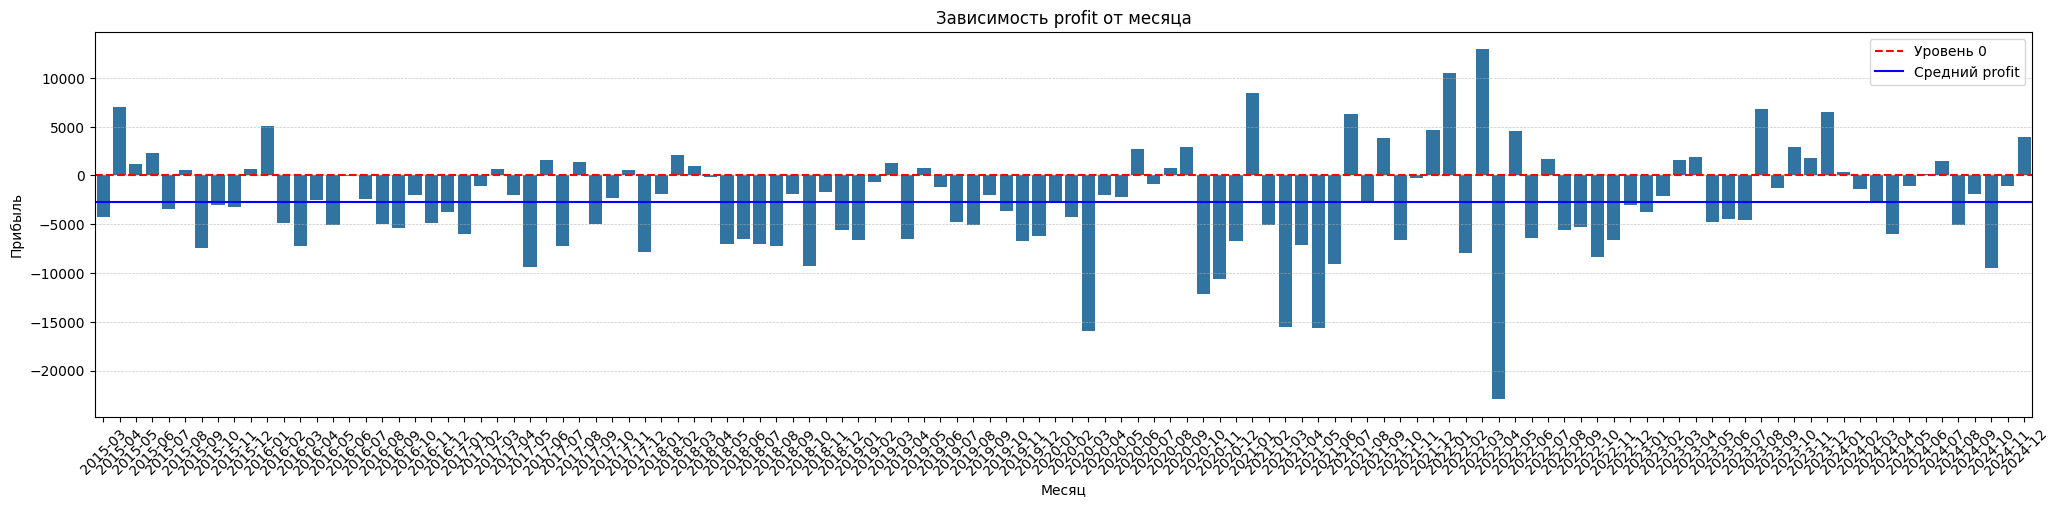

In [257]:
df_month_profit = df_month_profit.sort_values(by='year_month', ascending=True)

# Строим график зависимости
plt.figure(figsize=(25, 5))
sns.barplot(x=df_month_profit['year_month'].astype(str), y=df_month_profit['total_profit'])

# Добавляем горизонтальные линии
plt.axhline(
    y=0, color='red', linestyle='--', linewidth=1.5, label='Уровень 0'
    )  # Пример линии на уровне 0
plt.axhline(
    y=df_month_profit['total_profit'].mean(), color='blue', linestyle='-', linewidth=1.5, 
    label='Средний profit'
    )  # Среднее значение

# Добавляем горизонтальную сетку
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)  # Только по оси Y

plt.xticks(rotation=45)  # Поворачиваем подписи оси X для читаемости
plt.title('Зависимость profit от месяца')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')
plt.legend()  # Добавляем легенду
plt.show()

### График комулятивной прибыли для 2 сессий 10:05-14:10 и 15:15-18:30

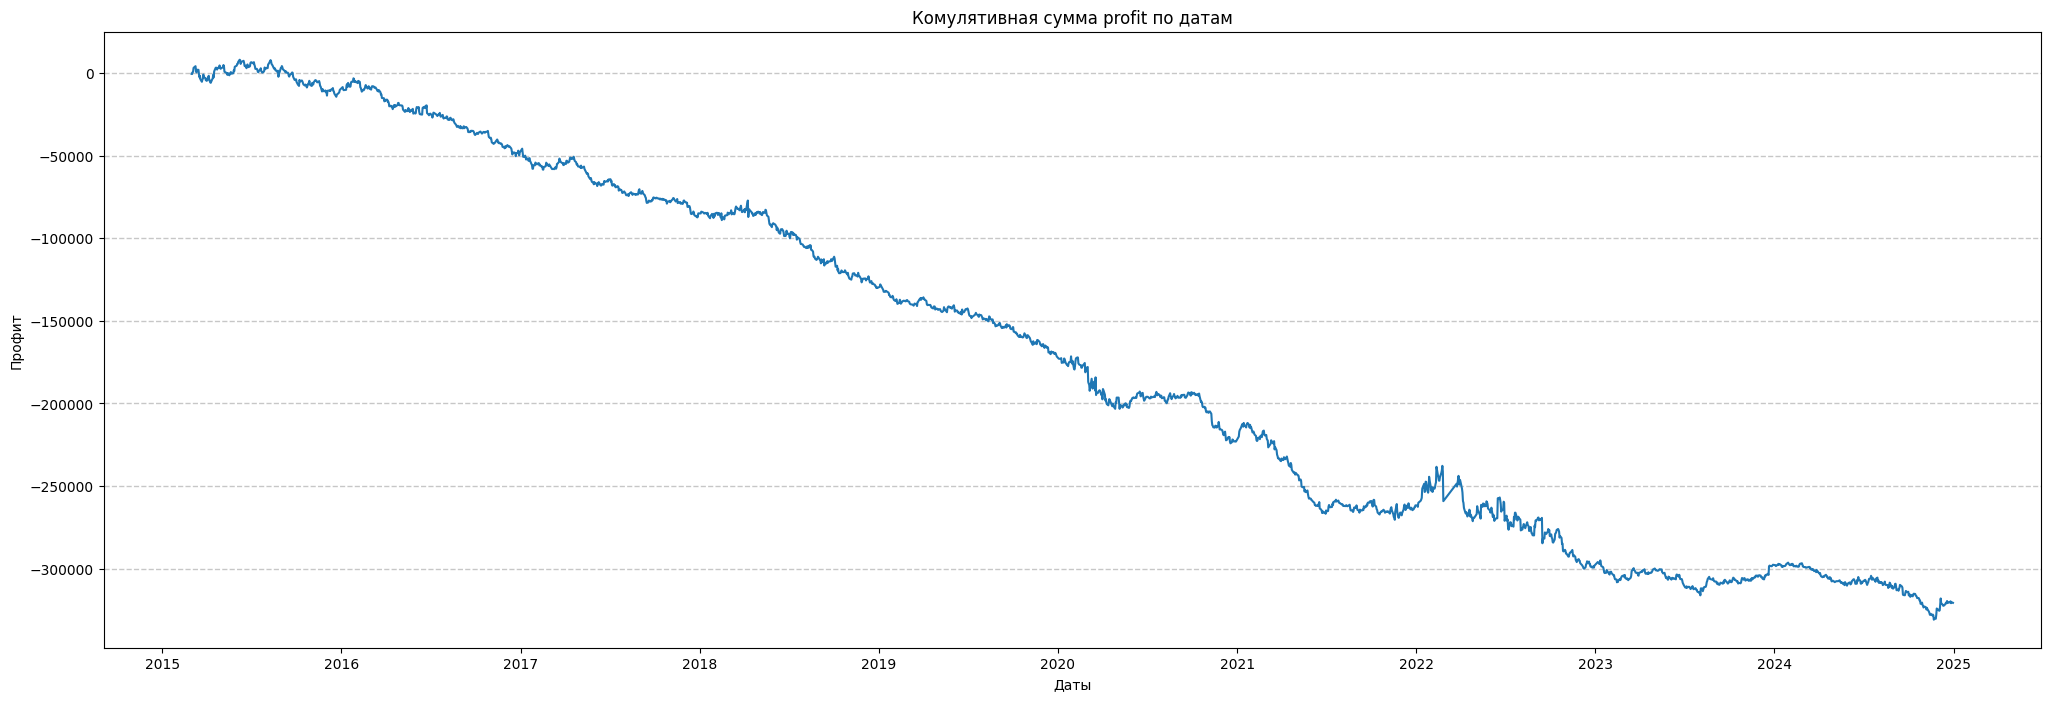

In [258]:
df_2_date['sum_profit'] = df_2_date['total_profit'].cumsum()

plt.figure(figsize=(25, 8))
sns.lineplot(data=df_2_date, x=df_2_date['date'], y='sum_profit')
plt.title('Комулятивная сумма profit по датам')
plt.grid(axis='y', linestyle='--', linewidth=1.0, alpha=0.7)  # Только по оси Y
plt.xlabel('Даты')
plt.ylabel('Профит')
plt.show()

In [259]:
df_tmp = df_tmp.iloc[0:0]

df_tmp = df_2.copy()

# Убедимся, что колонка с датой в формате datetime
df_tmp['date'] = pd.to_datetime(df['date'])

# Добавляем колонки для года и месяца
df_tmp['year'] = df_tmp['date'].dt.to_period('Y')  # Год и месяц в формате YYYY-MM

# Группируем данные по году и месяцу
df_year_profit = (
    df_tmp.groupby('year')
    .agg(
        total_profit=('profit', 'sum'),    # Сумма прибыли за месяц
        total_trades=('profit', 'count')  # Количество сделок за месяц
    )
    .reset_index()
)

df_year_profit['dollar'] = df_year_profit['total_profit'] * 0.02

df_year_profit

,year,total_profit,total_trades,dollar
0,2015,-9860.0,1207,-197.2
1,2016,-38210.0,1536,-764.2
2,2017,-36830.0,1478,-736.6
3,2018,-45180.0,1465,-903.6
4,2019,-41540.0,1443,-830.8
5,2020,-51060.0,1434,-1021.2
6,2021,-39050.0,1506,-781.0
7,2022,-36510.0,1379,-730.2
8,2023,550.0,1383,11.0
9,2024,-23050.0,1469,-461.0
